<a href="https://colab.research.google.com/github/kochleandro/Dolar-Pyton/blob/main/Dolar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
!pip install mplfinance

In [ ]:
df = pd.read_excel('/content/sample_data/USD_ARSB_Diario_2016_2023_mod.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: '/content/sample_data/USD_ARSB_Diario_2016_2023_mod.xlsx'

In [ ]:
df.reset_index(inplace=True)


NameError: name 'df' is not defined

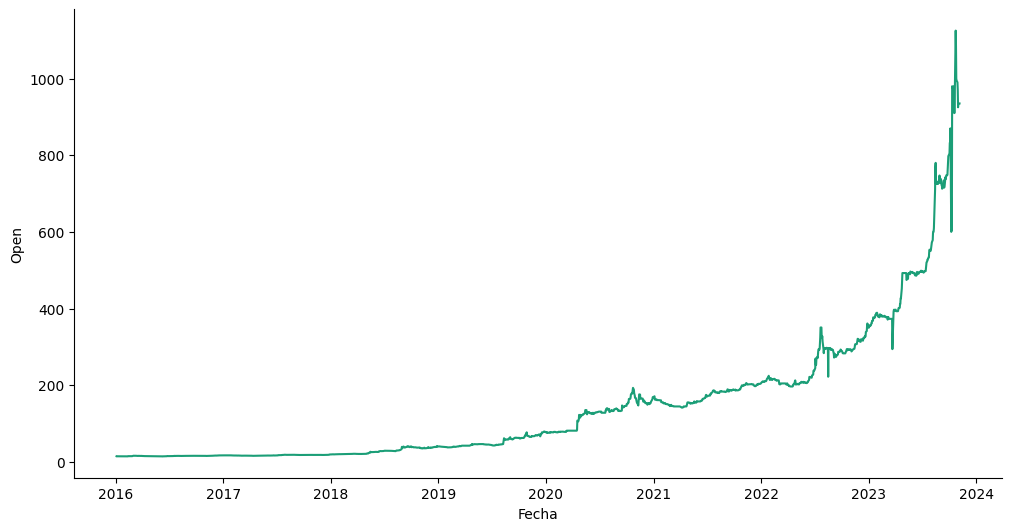

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Fecha']
  ys = series['Apertura']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Fecha', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Fecha')
_ = plt.ylabel('Open')

/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


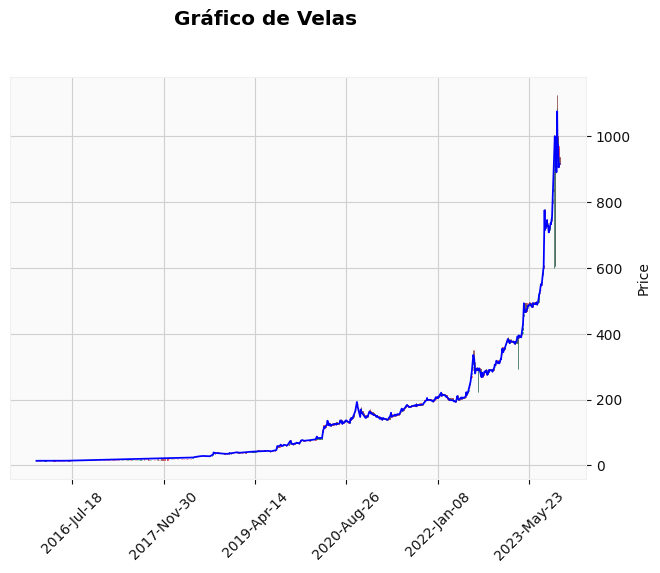

In [ ]:
import pandas as pd
import mplfinance as mpf

# Crear un nuevo DataFrame con los nombres de columna adecuados
df_corrected = df.rename(columns={'Ultimo': 'Close', 'Apertura': 'Open', 'Maximo': 'High', 'Minimo': 'Low'})

def _plot_series(series, series_name, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series.index
    ys_open = series['Open']
    ys_high = series['High']
    ys_low = series['Low']
    ys_close = series['Close']

    ap = [mpf.make_addplot(ys_close, color='b')]

    mpf.plot(series, type='candle', style='yahoo', title=series_name,
             addplot=ap, show_nontrading=True)

df_sorted = df_corrected.sort_values('Fecha', ascending=True)
df_sorted['Fecha'] = pd.to_datetime(df_sorted['Fecha'])
df_sorted.set_index('Fecha', inplace=True)

_plot_series(df_sorted, 'Gráfico de Velas')


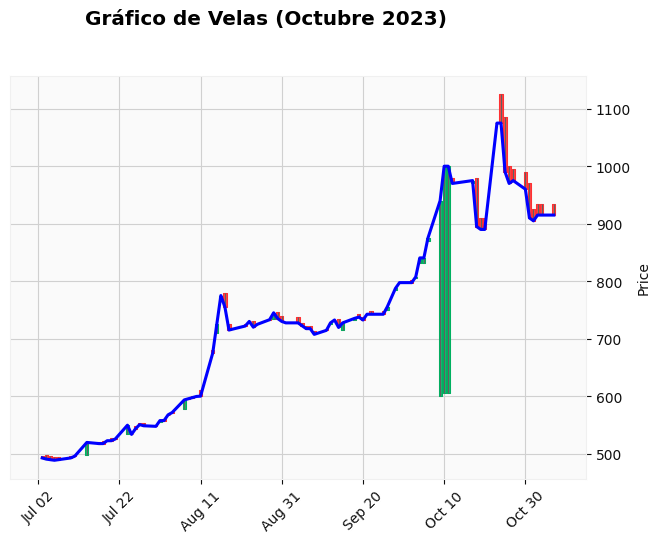

In [ ]:
import pandas as pd
import mplfinance as mpf

# Fuente de los datos https://es.investing.com/currencies/usd-arsb-historical-data

# Crear un nuevo DataFrame con los nombres de columna adecuados
df_corrected = df.rename(columns={'Ultimo': 'Close', 'Apertura': 'Open', 'Maximo': 'High', 'Minimo': 'Low'})

def _plot_series(series, series_name, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series.index
    ys_open = series['Open']
    ys_high = series['High']
    ys_low = series['Low']
    ys_close = series['Close']

    ap = [mpf.make_addplot(ys_close, color='b')]

    mpf.plot(series, type='candle', style='yahoo', title=series_name,
             addplot=ap, show_nontrading=True)

# Convertir la columna 'Fecha' a tipo datetime
df_corrected['Fecha'] = pd.to_datetime(df_corrected['Fecha'])

# Seleccionar un rango específico de fechas
start_date = '2023-07-01'
end_date = '2023-11-07'
df_selected = df_corrected[(df_corrected['Fecha'] >= start_date) & (df_corrected['Fecha'] <= end_date)]

df_sorted = df_selected.sort_values('Fecha', ascending=True)
df_sorted.set_index('Fecha', inplace=True)

_plot_series(df_sorted, 'Gráfico de Velas (Octubre 2023)')



In [ ]:
df

,Fecha,Ultimo,Apertura,Maximo,Minimo
0,2016-01-04,14.14,14.45,14.14,14.14
1,2016-01-05,14.27,14.16,14.27,14.27
2,2016-01-06,14.41,14.43,14.41,14.41
3,2016-01-07,14.41,14.55,14.41,14.41
4,2016-01-08,14.43,14.45,14.43,14.43
...,...,...,...,...,...
1910,2023-10-31,910.00,970.00,910.00,910.00
1911,2023-11-01,905.00,925.00,905.00,905.00
1912,2023-11-02,915.00,935.00,915.00,915.00
1913,2023-11-03,915.00,935.00,915.00,915.00


In [ ]:
X = df[['Fecha']]
y = df['Apertura']

In [ ]:
# separamos en entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
modelo = RandomForestRegressor(n_estimators=10)

In [ ]:
modelo.fit(X_train, y_train)


RandomForestRegressor(n_estimators=10)

In [ ]:
import datetime

# Supongamos que quieres predecir la cotización para 10 días en el futuro
dias_futuros =10
fecha_actual = df['Fecha'].max()  # Obtener la fecha más reciente en tus datos
fecha_futura = fecha_actual + datetime.timedelta(days=dias_futuros)

# Crear un DataFrame con la fecha futura
df_futuro = pd.DataFrame({'Fecha': [fecha_futura]})

# Preparar las características para la predicción
X_futuro = df_futuro[['Fecha']]

# Hacer la predicción
prediccion = modelo.predict(X_futuro)
print(prediccion)

[938.5]


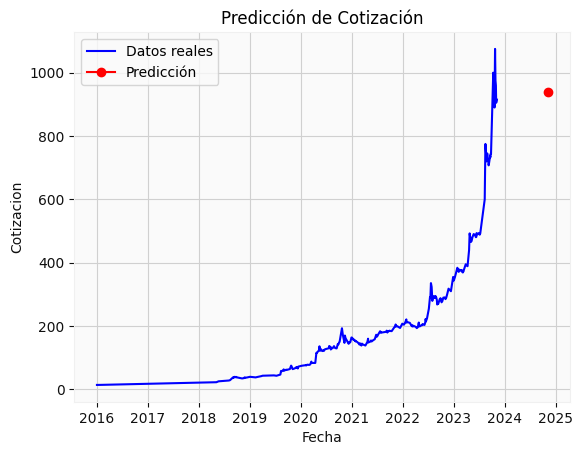

In [ ]:
import matplotlib.pyplot as plt

# Graficar los datos reales
plt.plot(df['Fecha'], df['Ultimo'], label='Datos reales', color='blue')

# Agregar la predicción al gráfico
plt.plot(fecha_futura, prediccion, marker='o', color='red', label='Predicción')

# Añadir etiquetas y leyenda
plt.xlabel('Fecha')
plt.ylabel('Cotizacion')
plt.title('Predicción de Cotización')
plt.legend()

# Mostrar el gráfico
plt.show()


In [ ]:
y_pred = modelo.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 23.05366595824634


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler


df.drop(['Maximo', 'Minimo'], axis=1)

# 1. Escalar los datos (puedes elegir el tipo de escalado que prefieras)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Ultimo', 'Apertura']])

# 2. Crear secuencias de tiempo
n_steps = 365  # Por ejemplo, usaremos secuencias de 10 días
X, y = [], []
for i in range(len(scaled_data) - n_steps):
    X.append(scaled_data[i:i+n_steps])
    y.append(scaled_data[i+n_steps, 0])  # Tomamos el valor "Ultimo" del siguiente día

X, y = np.array(X), np.array(y)

# 3. Dividir los datos en conjuntos de entrenamiento y prueba
split_index = int(0.8 * len(X))  # Por ejemplo, usaremos un 80% para entrenamiento
X_train, y_train = X[:split_index], y[:split_index]
X_test, y_test = X[split_index:], y[split_index:]

# 4. Asegúrate de que los datos tengan la forma correcta para la entrada del modelo RNN
X_train = X_train.reshape(-1, n_steps, 2)  # 2 porque tenemos 2 características
X_test = X_test.reshape(-1, n_steps, 2)

# Ahora, X_train, y_train, X_test y y_test están listos para ser utilizados en tu modelo de RNN.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Preparar los datos (X_train y y_train deben estar en el formato adecuado)
# ...
n_steps = 365  # Número de pasos en cada secuencia (ventana de tiempo)
n_features = 2  # Número de características en cada paso


# Construir el modelo
model = Sequential([
    SimpleRNN(64, activation='relu', input_shape=(n_steps, n_features)),
    Dense(1)
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
model.fit(X_train, y_train, epochs=1, batch_size=32)

# Hacer predicciones
y_pred = model.predict(X_test)


10/10 [==============================] - 0s 16ms/step


In [ ]:
# Supongamos que quieres predecir la cotización para 10 días en el futuro
dias_futuros = 150
fecha_actual = df['Fecha'].max()  # Obtener la fecha más reciente en tus datos
fecha_futura = fecha_actual + pd.DateOffset(days=dias_futuros)

# Obtener los últimos n_steps días como entrada para la predicción
ultimos_dias = df[df['Fecha'] > fecha_actual - pd.DateOffset(days=n_steps)]
datos_entrada = scaler.transform(ultimos_dias[['Ultimo', 'Apertura']])
datos_entrada = datos_entrada[-n_steps:]  # Tomar solo los últimos n_steps días

# Asegúrate de que sea una lista de un solo elemento
datos_entrada = np.array([datos_entrada])

# Hacer la predicción
prediccion_escalada = model.predict(datos_entrada)

# Invertir la transformación (si aplicable)
prediccion_original = scaler.inverse_transform(np.array([[prediccion_escalada[0, 0], 0]]))[0, 0]

print(f'Predicción para {fecha_futura}: {prediccion_original}')



1/1 [==============================] - 0s 96ms/step
Predicción para 2024-04-04 00:00:00: 961.2282182126937
